In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random



In [2]:
class Action:
    def __init__(self,name,x_direct,y_direct,r):
        self.name=name
        self.x_direct=x_direct
        self.y_direct=y_direct
        self.reward=r
        self.Q=0

    

    

In [3]:
class Position:
    def __init__(self,x,y):
        self.x=x
        self.y=y
        self.actions=[]
    def argmax(self):
        Q_list=[act.Q for act in self.actions]
        return random.choice([act for act in self.actions if act.Q==max(Q_list)])
    def get_action(self,name):
        for act in self.actions:
            if act.name==name:
                return act 

    def Select_Action(self,eps):
        if np.random.rand() < eps:
            return np.random.choice(self.actions)
        return self.argmax()
    def start_reward(self,name="None"):
        for act in self.actions:
            if act.name==name:
                act.reward=10
            else:
                act.reward=-1
    
        

In [4]:
class Gridworld:
    def __init__(self,Height,Width,start,goal,actions,rs,rg,wind,eps):
        self.Height=Height
        self.Width=Width
        self.start=start
        self.goal=goal
        self.state=start
        self.reward_s=rs
        self.reward_g=rg
        self.grid=[]
        self.wind=wind
        self.epsilon=eps
        self.actions=actions
        for x in range(1,self.Width+1):
            for y in range(1,self.Height+1):
                p=Position(x,y)
                for act in self.actions:
                    p.actions.append(Action(act[0],act[1],act[2],rs))
                self.grid.append(p)

 
                    
    def Goal_rewards(self):
        for p in self.grid:
            if self.goal==(p.x+1,p.y):
                p.get_action('E').reward=self.reward_g   
            if self.goal==(p.x,p.y+1):
                p.get_action('N').reward=self.reward_g  
            if self.goal==(p.x-1,p.y) :
                p.get_action('W').reward=self.reward_g  
            if self.goal==(p.x,p.y-1) :
                p.get_action('S').reward=self.reward_g   
            if self.goal==(p.x-1,p.y-1) :
                p.get_action('SW').reward=self.reward_g   
            if self.goal==(p.x+1,p.y+1):
                p.get_action('NE').reward=self.reward_g   
            if self.goal==(p.x+1,p.y-1):
                p.get_action('SE').reward=self.reward_g  
            if self.goal==(p.x-1,p.y+1):
                p.get_action('NW').reward=self.reward_g  
 

    def Position(self,x,y):
        for pos in self.grid:
            if pos.x==x and pos.y==y:
                return pos



    
    def get_wind(self, column_wind):
        choices = [self.wind[column_wind], self.wind[column_wind] + 1, self.wind[column_wind] - 1]
        wind = np.random.choice(choices)
        return wind if self.wind[column_wind] > 0 else self.wind[column_wind]
        
    
                    
    def Next(self,eps=0.2):
        goal=False
        Actual_Pos=self.Position(self.state[0],self.state[1])
        selected_action=Actual_Pos.Select_Action(eps)
        Next_Pos=self.Borders(Actual_Pos,selected_action)
        R=selected_action.reward
        selected_action.Q=selected_action.Q+0.1*(R+0.9 * Next_Pos.argmax().Q - selected_action.Q)
        if (Next_Pos.x,Next_Pos.y)==self.goal:
            goal=True
        return (Next_Pos.x,Next_Pos.y),goal,R
    
    def Borders(self,Actual_Pos,selected_action):
        wind=self.get_wind(Actual_Pos.x)
        return self.Position(min(max(Actual_Pos.x+selected_action.x_direct,1),self.Width),min(max(Actual_Pos.y+selected_action.y_direct,1),self.Height))

      
 

In [5]:
#my grid start from 1, So I add an extra 0 at the indix o here
wind=[0, 0,0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0,0]

In [6]:
NE=("NE",1,1)
NW=("NW",-1,1)
SE=("SE",1,-1)
SW=("SW",-1,-1)
N=("N",0,1)
S=("S",0,-1)
W=("W",-1,0)
E=("E",1,0)

Actions=[NW,SE,SW,N,S,W,E,NE]

In [7]:
Gw=Gridworld(9,13,(1,3),(9,3),Actions,-1,10,wind,0.2)

In [8]:
Gw.Goal_rewards()

In [9]:

Gw.state=Gw.start
steps=[]
rewards=[]
for x in range(5000):
    i=0
    Gw.state=Gw.start
    path=[]
    reward=0
    while True:
            i+=1
            if x==4999:
                path.append(Gw.state)
                Gw.state,goal,R=Gw.Next(0)
                
            else:
                Gw.state,goal,R=Gw.Next()
            reward+=R
            if goal:
                path.append(Gw.state)
                steps.append(i)

                rewards.append(reward)
                        
                break

In [10]:
path

[(1, 3), (2, 4), (3, 4), (4, 3), (5, 3), (6, 2), (7, 2), (8, 3), (9, 3)]

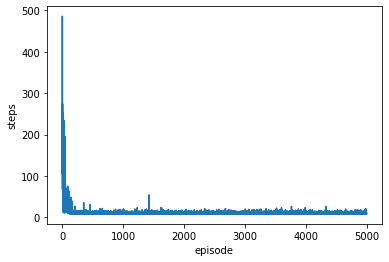

In [11]:
plt.plot(steps)
plt.xlabel('episode')
plt.ylabel('steps')
plt.savefig("eps.png")

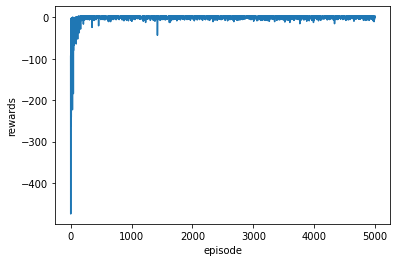

In [12]:
plt.plot(rewards)
plt.xlabel('episode')
plt.ylabel('rewards')
plt.savefig("reward.png")

/home/agwilal/.local/lib/python3.8/site-packages/matplotlib/quiver.py:679: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/agwilal/.local/lib/python3.8/site-packages/matplotlib/quiver.py:679: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


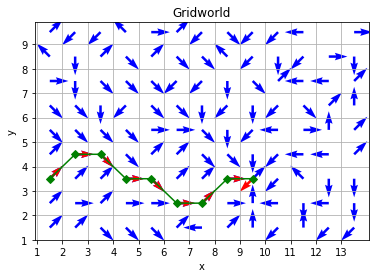

In [13]:

for p in Gw.grid:
    plt.quiver(p.x+0.5,p.y+0.5,p.argmax().x_direct, p.argmax().y_direct,color="blue")
    if (p.x,p.y) in path:
        plt.quiver(p.x+0.5,p.y+0.5,p.argmax().x_direct, p.argmax().y_direct,color="red")
        plt.plot(p.x+0.5, p.y+0.5)

xs =[]    
ys = []
for p in path:
    xs.append(p[0]+0.5)
    ys.append(p[1]+0.5)



plt.plot(xs, ys, '-gD')



plt.xlabel('x')
plt.ylabel('y')
plt.title('Gridworld')

plt.xticks(np.arange(1, 14, step=1))
plt.yticks(np.arange(1, 10, step=1))
plt.grid(True)
plt.savefig("grid.png")
plt.show()
    
    
    

